## Bayesian Inference with a good Prior

We want to compute the posterior distribution and P(y|Y) distribution in order to see how the posterior fits our model.
At first we set the given values and we increas the degree of the polynoial +1 to compute Θο too. f_x function return us the y values with out noise and x_column the produced vector for a value x. 


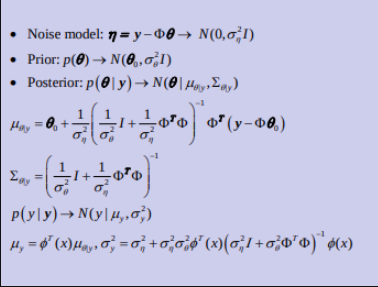

In [1]:
import numpy as np

In [2]:
import math
import matplotlib.pyplot as plt
theta = np.array([0.2, -1, 0.9, 0.7,0,-0.2])
value_s_th=th=0.1
degree=5+1
# define y
def f_x(x,th):
  y_real=np.matmul(th.T,x)
  return y_real
def x_column(x,degree):
  x_col=[]
  for i in range(degree):
    x_col.append(x**i)
  x_col=np.array([x_col])
  x_col=np.reshape(x_col,(degree,))
  return x_col 

Function meantheta returns the MAP, vartheta returns the variance of theta and vary computes the variance of P(y|Y)

In [3]:
#find the MAP theta
def meantheta(theta,varerror,value_s_th,Fx,y):  
  F=np.matmul(Fx.T,Fx)
  cov_inv=(1/value_s_th)*np.identity(len(theta))
  Fcov=np.linalg.inv(cov_inv+(1/varerror)*F)
  FcovF=np.matmul(Fcov,Fx.T)
  Fth=np.matmul(Fx,theta)
  yFth=y-Fth
  meanth=theta+(1/varerror)*np.matmul(FcovF,yFth)
  return meanth


#find the Variance of theta 
def vartheta(value_s_th,varerror,Fx):
  th=(1/value_s_th)*np.identity(len(theta))
  F=(1/varerror)*np.matmul(Fx.T,Fx)
  vara=np.linalg.inv(th+F)
  return vara 

#find the Variance of P(y|Y) in order to make the errorbars
def vary(varerror,value_s_th,fx,Fx):
  v=vartheta(value_s_th,varerror,Fx)
  Fv=np.matmul(fx.T,v)
  FvF=np.matmul(Fv,fx)
  var_y=varerror+varerror*value_s_th*FvF
  return var_y

In [4]:
def generate_x_y(N,theta,degree):
  y=[]
  xN=[] #this will be used as Φ
  # generate the sample of N=20
  # we consider this sample as training set 
  xgener=np.random.uniform(0,2,N)
  for i in range(0,N):
    xtemp=x_column(xgener[i],degree)
    xN.append(xtemp)
    y.append(f_x(xtemp,theta))
  y=np.asarray(y)
  xN=np.asarray(xN)
  return xN,xgener,y

In [5]:
xN,xgener,y=generate_x_y(20,theta,degree)


In [6]:
def estimation(N,theta,value_s_theta,s_error,xN,y):
  noise=np.random.normal(0,s_error,N)
  y_est=[] #estimation of y
  var_y=[] #var ot p(y|Y)
  meanth= meantheta(theta,s_error,value_s_theta,xN,y)
  print(meanth)
  for i in range(N):
    ye=f_x(xN[i],meanth)+noise[i]
    y_est.append(ye)
    var_y.append(vary(s_error,value_s_theta,xN[i],xN))
  y_est=np.array(y_est) 
  return(y_est,var_y)

In [7]:
#for σ(η)=0.05
y_est1,var_y1=estimation(20,theta,value_s_th,0.05,xN,y)

#for σ(η)=0.15
y_est2,var_y2=estimation(20,theta,value_s_th,0.15,xN,y)


[ 2.00000000e-01 -1.00000000e+00  9.00000000e-01  7.00000000e-01
  1.64630747e-17 -2.00000000e-01]
[ 2.00000000e-01 -1.00000000e+00  9.00000000e-01  7.00000000e-01
  9.77142999e-18 -2.00000000e-01]


In [8]:
#create the actual plot with random amount of points
x=np.random.uniform(0,2,1000)
x.sort()
y_real=[]
for i in range(len(x)):
  x_input=x_column(x[i],degree)
  y_real.append(f_x(x_input,theta))

<ErrorbarContainer object of 3 artists>

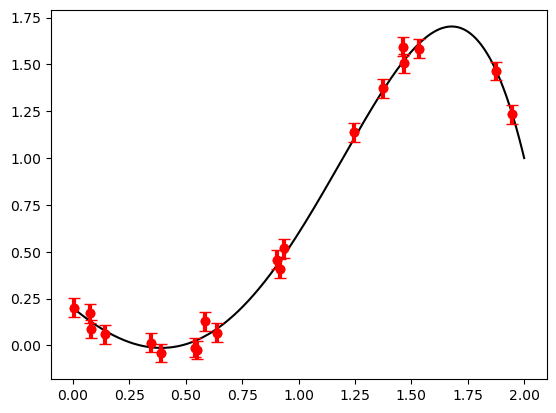

In [9]:
plt.plot(x,y_real,color='black')
plt.scatter(xgener,y_est1,color='red')
plt.errorbar(xgener, y_est1, var_y1, fmt='o',color='red',elinewidth=3, capsize=4)

<ErrorbarContainer object of 3 artists>

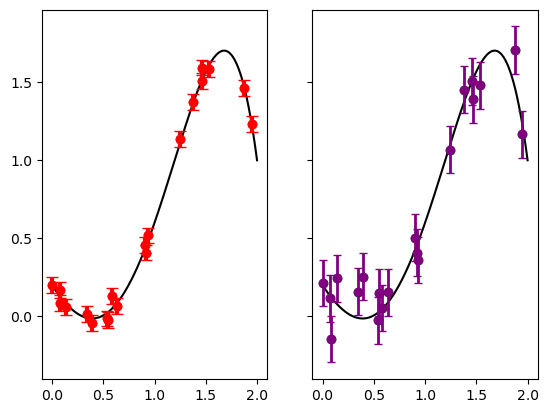

In [10]:
#compering the different plots between the σ(η)=0.05 , σ(η)=0.15
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,y_real,color='black')
ax1.scatter(xgener,y_est1,color='red')
ax1.errorbar(xgener,y_est1,var_y1, fmt='o',color='red',elinewidth=3, capsize=4)

ax2.plot(x,y_real,color='black')
ax2.scatter(xgener,y_est2,color='green')
ax2.errorbar(xgener, y_est2, var_y2, fmt='o',color='purple',elinewidth=2, capsize=3)

We can easily observe that despite the fact of the perfect given prior, the distribution sith σ(η)=0.15 doesn't return us as well fitted results as the distribution with σ(η)=0.05. Also we can observe that the variance of P(y|Y) is increases when the variance of the error is bigger.

In [13]:
def mse(y_real, y_predicted):
    summation = 0  #variable to store the summation of differences
    n = len(y_real) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
      difference = y_real[i] - y_predicted[i]  #finding the difference between observed and predicted value
      squared_difference = difference**2  #taking square of the differene
      summation = summation + squared_difference  #taking a sum of all the differences
    mse = summation/n
    return mse

In [14]:
# same with a test sample for fun

xN_test,xgener1_test,y_test=generate_x_y(20,theta,degree)

#for σ(η)=0.05
y_est1_test,var_y1_test=estimation(20,theta,value_s_th,0.05,xN_test,y_test)

#for σ(η)=0.15
y_est2_test,var_y2_test=estimation(20,theta,value_s_th,0.15,xN_test,y_test)

mse_14_005 = mse(y_test, y_est1_test)

mse_14_015 = mse(y_test, y_est2_test)

[ 2.00000000e-01 -1.00000000e+00  9.00000000e-01  7.00000000e-01
  4.52578882e-17 -2.00000000e-01]
[ 2.00000000e-01 -1.00000000e+00  9.00000000e-01  7.00000000e-01
  2.63715891e-17 -2.00000000e-01]


<ErrorbarContainer object of 3 artists>

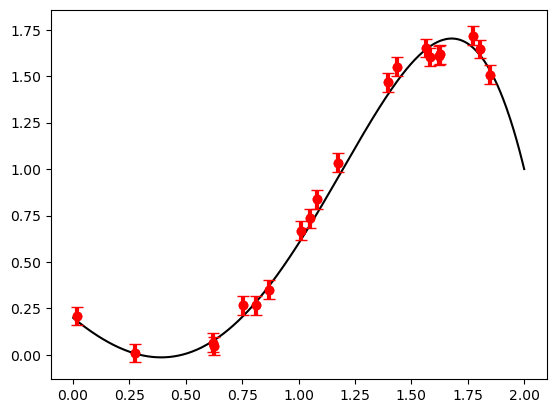

In [15]:
plt.plot(x,y_real,color='black')
plt.scatter(xgener1_test,y_est1_test,color='red')
plt.errorbar(xgener1_test, y_est1_test, var_y1_test, fmt='o',color='red',elinewidth=3, capsize=4)

<ErrorbarContainer object of 3 artists>

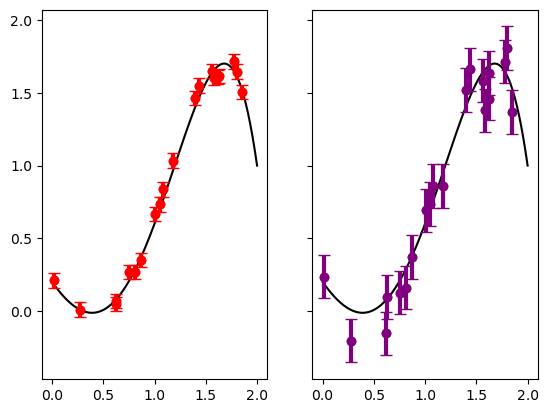

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x,y_real,color='black')
ax1.scatter(xgener1_test,y_est1_test,color='red')
ax1.errorbar(xgener1_test, y_est1_test, var_y1_test, fmt='o',color='red',elinewidth=3, capsize=4)

ax2.plot(x,y_real,color='black')
ax2.scatter(xgener1_test,y_est2_test,color='purple')
ax2.errorbar(xgener1_test, y_est2_test, var_y2_test, fmt='o',color='purple',elinewidth=3, capsize=4)

In [17]:
#seems that the test set fits good enough


## Bayesian Inference with a bad Prior

The given theta vector is Θ=[-10.54, 0.465, 0.0087,-0.093, -0.004], although adding the Θο=0 in the first possition, since vector x=[1,x,x^2,x^3,x^4,x^5] it is getting the form of theta_5=[0,-10.54, 0.465, 0.0087,-0.093, -0.004]

In [18]:
theta_5 = np.array([0,-10.54, 0.465, 0.0087,-0.093, -0.004])
value_s_th1=0.1
value_s_th2=2
N1=20
N2=200
s_error=0.05

[ 1.76793017 -6.39906464  3.62200241  1.51414723 -0.12456162 -0.40367839]


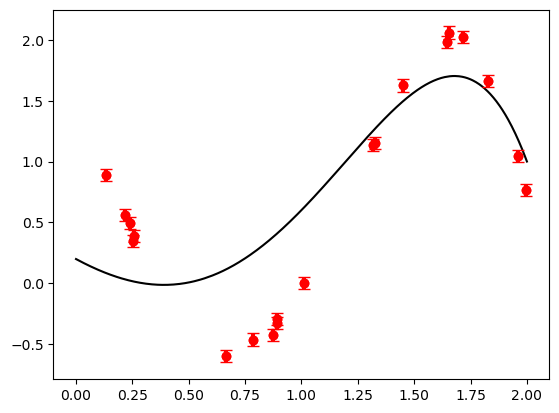

In [19]:
#experiment 1 with 20 numbers as training set and s_theta=0.1
xN,xgener,y=generate_x_y(N1,theta,degree)
y_est,var_y=estimation(N1,theta_5,value_s_th1,s_error,xN,y)

plt.plot(x,y_real,color='black')
plt.scatter(xgener[:N1],y_est[:N1],color='red')
plt.errorbar(xgener[:N1], y_est[:N1], var_y[:N1], fmt='o',color='red',elinewidth=3, capsize=4)

mse_15_exp1 = mse(y, y_est)

[ 0.78651325 -3.84751884  3.85852662  0.61555441 -0.95100287  0.08657747]


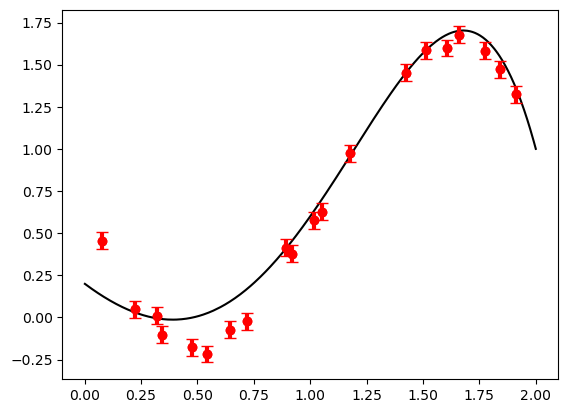

In [20]:
#experiment 2 with 200 numbers as training set and s_theta=0.1 (we use only 20 for the diagram)
xN,xgener,y=generate_x_y(N2,theta,degree)
y_est,var_y=estimation(N2,theta_5,value_s_th1,s_error,xN,y)

plt.plot(x,y_real,color='black')
plt.scatter(xgener[:N1],y_est[:N1],color='red')
plt.errorbar(xgener[:N1], y_est[:N1], var_y[:N1], fmt='o',color='red',elinewidth=3, capsize=4)

mse_15_exp2 = mse(y, y_est)

[ 0.29066392 -1.69541958  2.25606115 -0.29886447  0.2737167  -0.2154588 ]


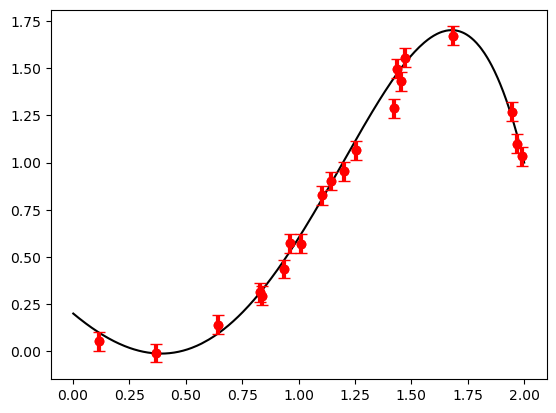

In [22]:
#experiment 3 with 20 numbers as training set and s_theta=2 
xN,xgener,y=generate_x_y(N2,theta,degree)
y_est,var_y=estimation(N2,theta_5,value_s_th2,s_error,xN,y)

plt.plot(x,y_real,color='black')
plt.scatter(xgener[:N1],y_est[:N1],color='red')
plt.errorbar(xgener[:N1], y_est[:N1], var_y[:N1], fmt='o',color='red',elinewidth=3, capsize=4)

mse_15_exp3 = mse(y, y_est)

[ 0.3221476  -1.82150028  2.39429686 -0.32212379  0.2425245  -0.20421369]


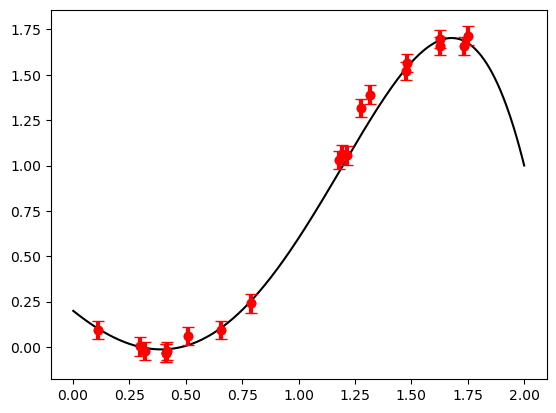

In [23]:
#experiment 4 with 200 numbers as training set and s_theta=2  (we use only 20 for the diagram)
xN,xgener,y=generate_x_y(N2,theta,degree)
y_est,var_y=estimation(N2,theta_5,value_s_th2,s_error,xN,y)

plt.plot(x,y_real,color='black')
plt.scatter(xgener[:N1],y_est[:N1],color='red')
plt.errorbar(xgener[:N1], y_est[:N1], var_y[:N1], fmt='o',color='red',elinewidth=3, capsize=4)

mse_15_exp4 = mse(y, y_est)

We can easily observe that we have a big trainning set the bad prior doesn't messes with the final distribution. Also we observe that when theta parameter has big variance, the final returns are better fitted in the curve, because we didn't completly trust the PDF. 